<a href="https://colab.research.google.com/github/jsroa15/Kaggle-Projects/blob/main/House_Pricing_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importings and loading data

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:
#Load data
training=pd.read_csv('/content/drive/My Drive/Colab Notebooks/House Pricing Prediction/train.csv')
test=pd.read_csv('/content/drive/My Drive/Colab Notebooks/House Pricing Prediction/test.csv')

In [ ]:
#Add some colums to identify training and test data, then merge both dataframes
#in order to modify columns after making EDA or Feature Engineering
training['training_data']=1
test['training_data']=0
all_data=training.append(test)
all_data.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,training_data
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,...,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN,0
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,...,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN,0
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,...,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN,0
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,...,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN,0
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,2Story,7,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,BrkFace,94.0,TA,TA,PConc,Gd,TA,Av,LwQ,758.0,Unf,0.0,238.0,996.0,GasA,...,SBrkr,996,1004,0,2000,0.0,0.0,2,1,3,1,TA,9,Typ,1,TA,Attchd,1993.0,Fin,3.0,650.0,TA,TA,Y,190,48,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal,NaN,0


# Exploratory Data Analysis (EDA)

In [ ]:
#Exploring the data type and shape
training.info()
print('\nShape of Training Data:',training.shape[0],'Rows ','and ',training.shape[1],' Columns')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
#Checking and changing variables types if necesary.
#'YearBuilt','YearRemodAdd','GarageYrBlt','MoSold','YrSold'
training[['MSSubClass','OverallQual','OverallCond','YearBuilt','YearRemodAdd','GarageYrBlt','MoSold','YrSold']]=training[['MSSubClass','OverallQual','OverallCond','YearBuilt','YearRemodAdd','GarageYrBlt','MoSold','YrSold']].astype('str')
training[['Id','training_data']]=training[['Id','training_data']].astype('category')

In [ ]:
#Describing the data
#Here is important to note the measures in order to select the proper imputing
#strategy if there are missing values in data
training.describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1201.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890
std,24.284752,9981.264932,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883
min,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,59.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000
50%,69.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000
75%,80.000000,11601.500000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000
max,313.000000,215245.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,755000.000000


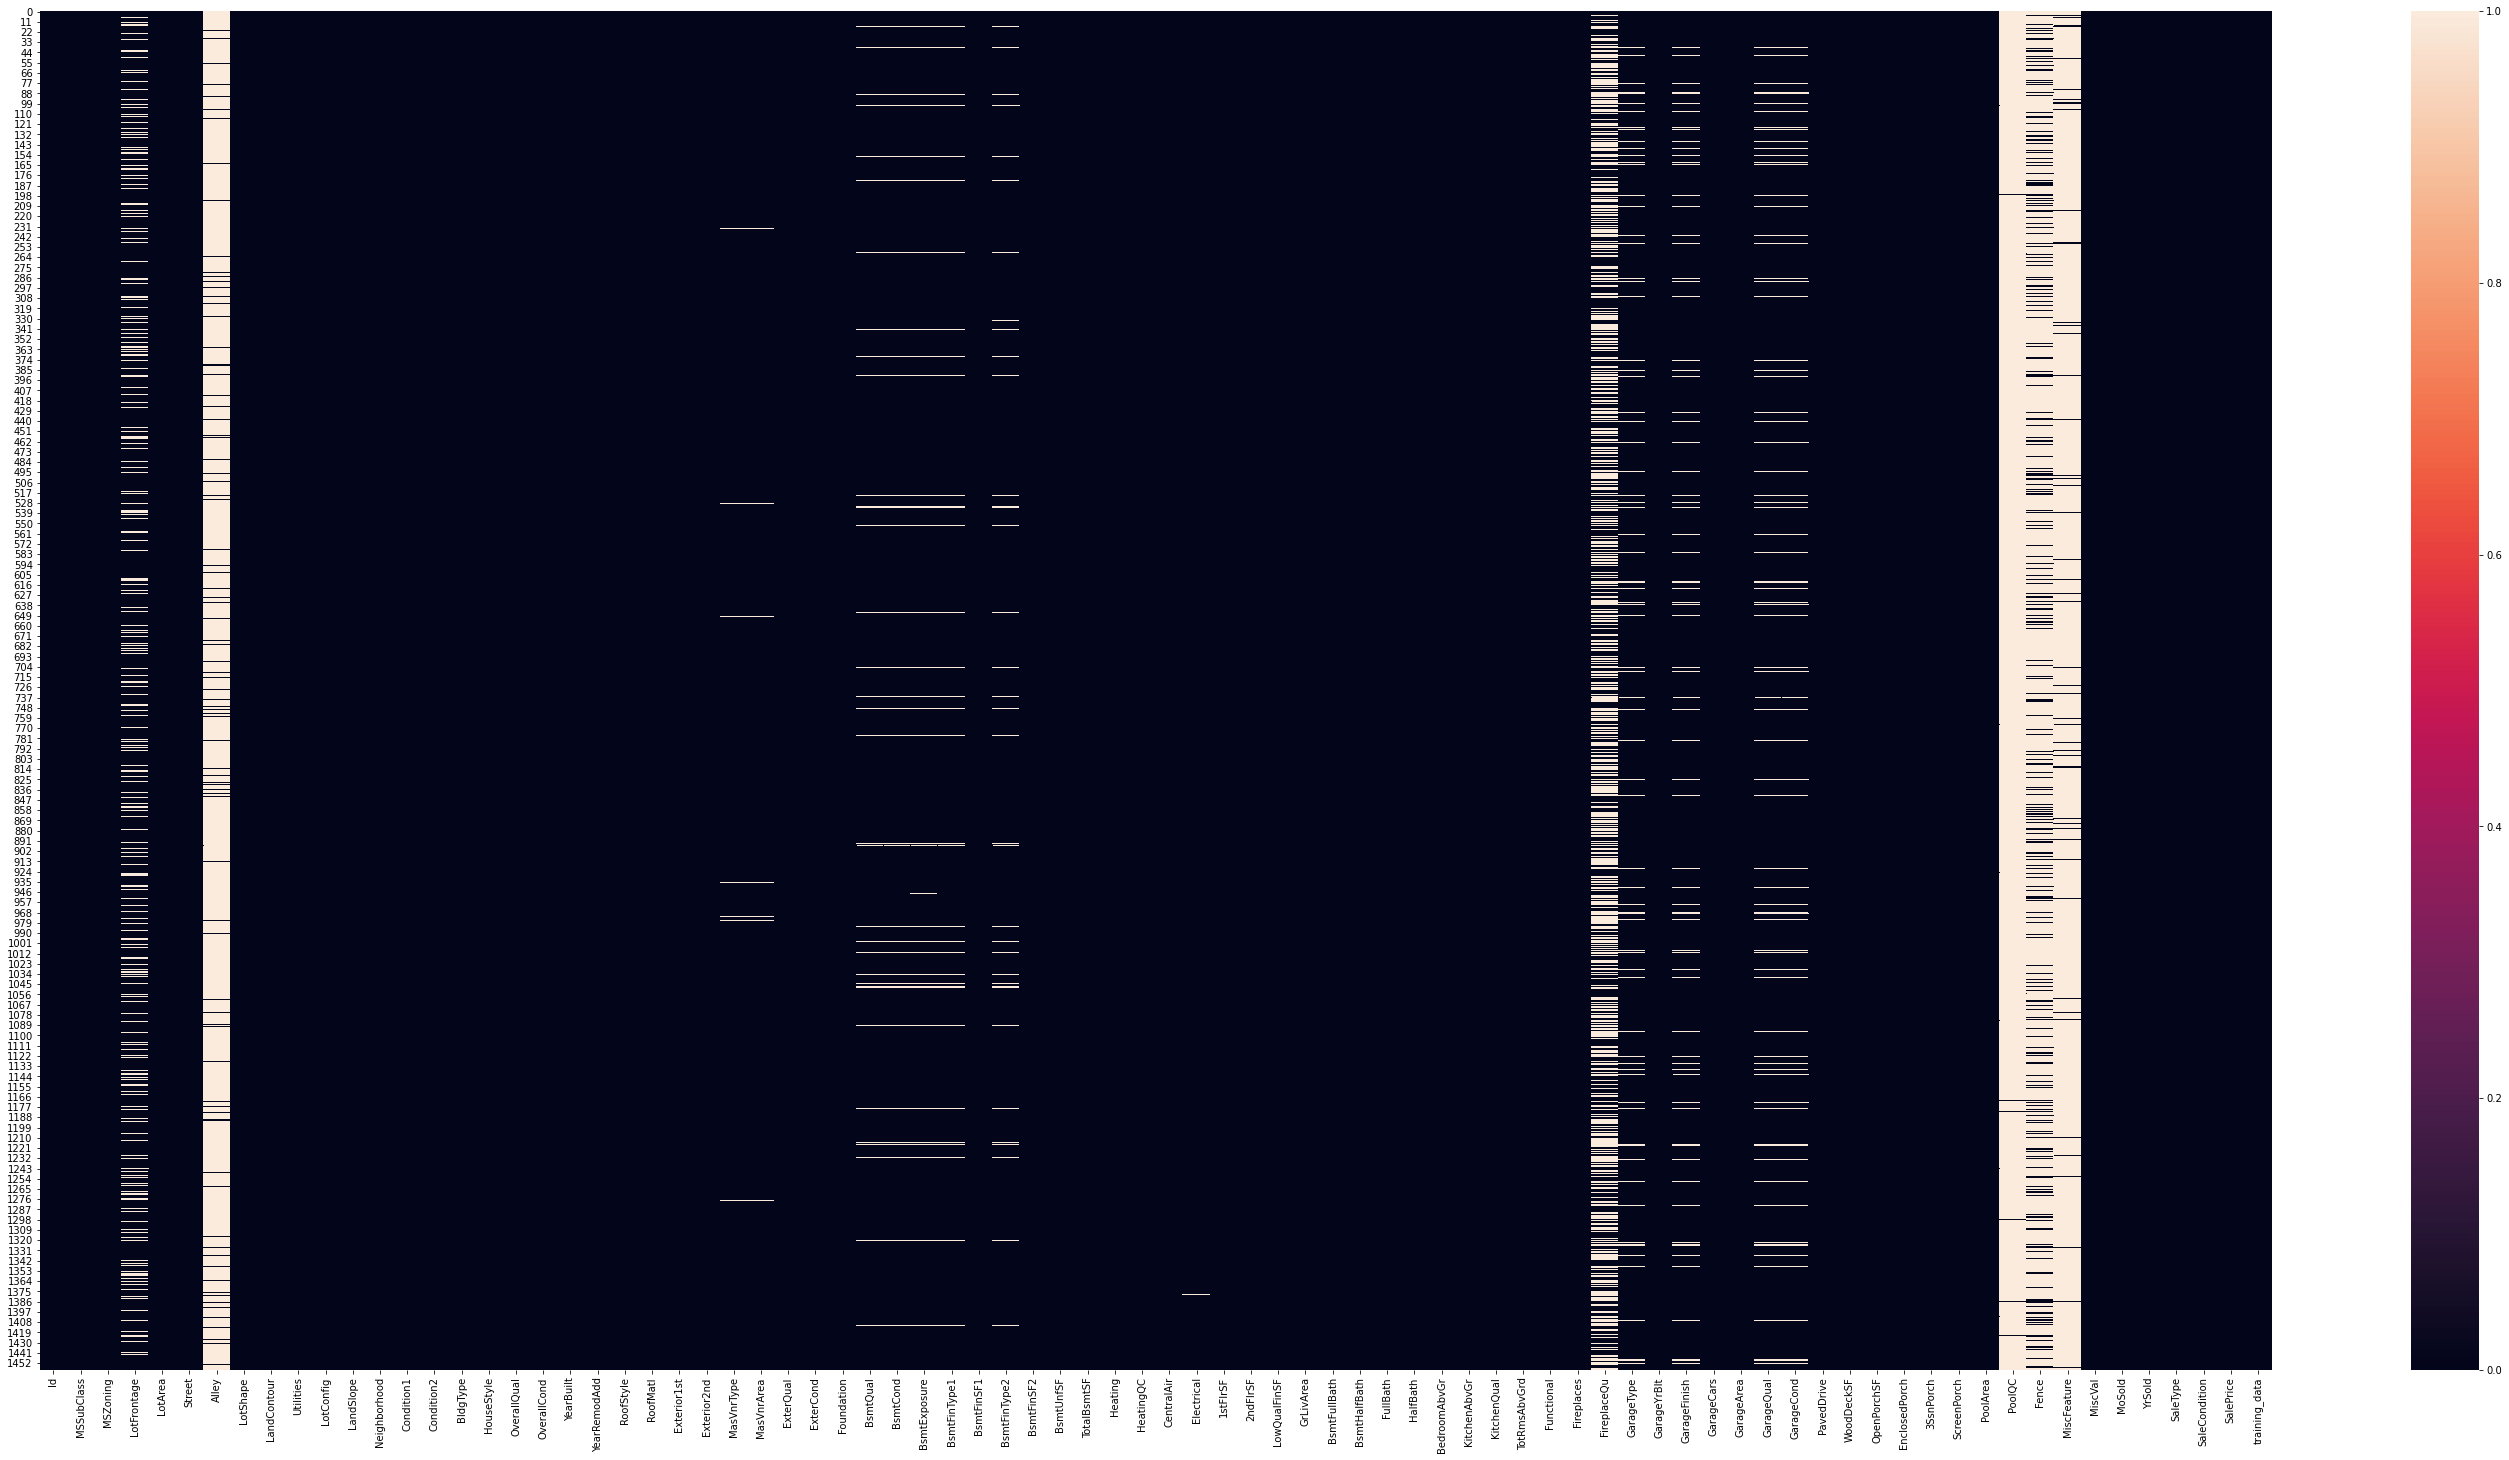

In [ ]:
#Checking missing values
plt.figure(figsize=(50,25))
sns.heatmap(training.isna())
plt.show()

missing_values=training.isna().sum().sort_values(ascending=False)

In [ ]:
#Extracting numerical variables for EDA
list_numerical=[x for x in training.columns if training[x].dtype!='object']
numerical=training[list_numerical].drop(['Id','training_data'],axis=1)
numerical.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'SalePrice'],
      dtype='object')

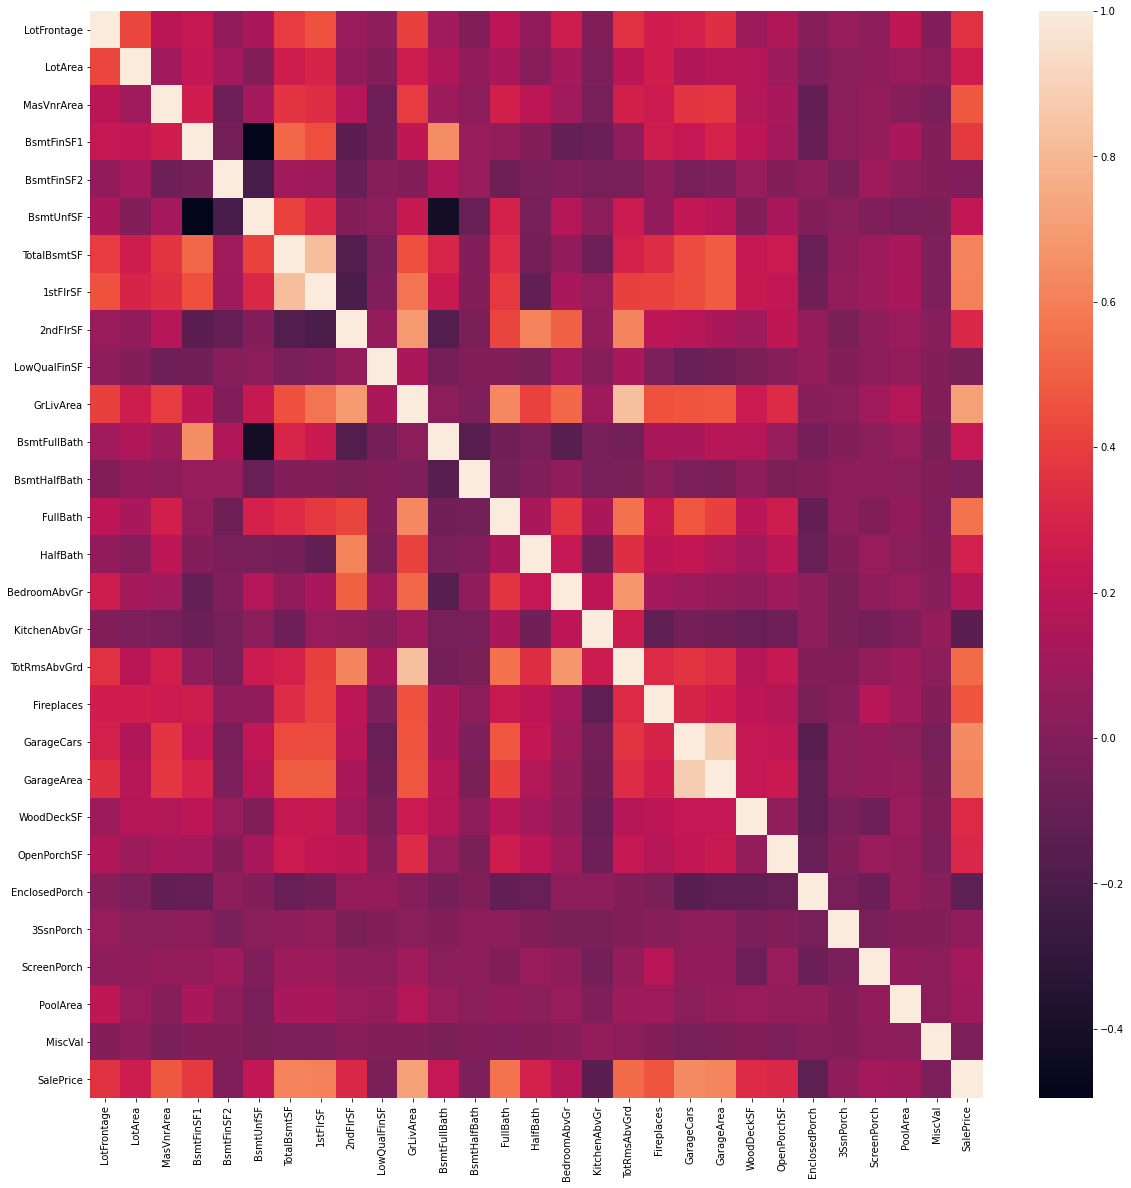

In [ ]:
#Exploring Correlation between numeric variables
plt.figure(figsize=(20,20))
sns.heatmap(numerical.corr())
plt.show()

According to the figure, there are several variables correlated each other. It´s a clear signal of multicollinearity, which means that we have some variables that represent the same information.

Examples:
*   GarageCars Vs GarageArea
*   TotalBsmtSF Vs 1stFlrSF

Later, we can keep one of the variables for each pair.



In [ ]:
#Exploring correlation between SalePrice and the rest.
correlation=training.corr()
correlation[['SalePrice']].sort_values(by='SalePrice',ascending=False).style.background_gradient()

,SalePrice
SalePrice,1.000000
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
MasVnrArea,0.477493
Fireplaces,0.466929


Now, we are gonna analyze the linear relation between SalePrice and its most correlated variables (Excluding those that are highly correlated each other)

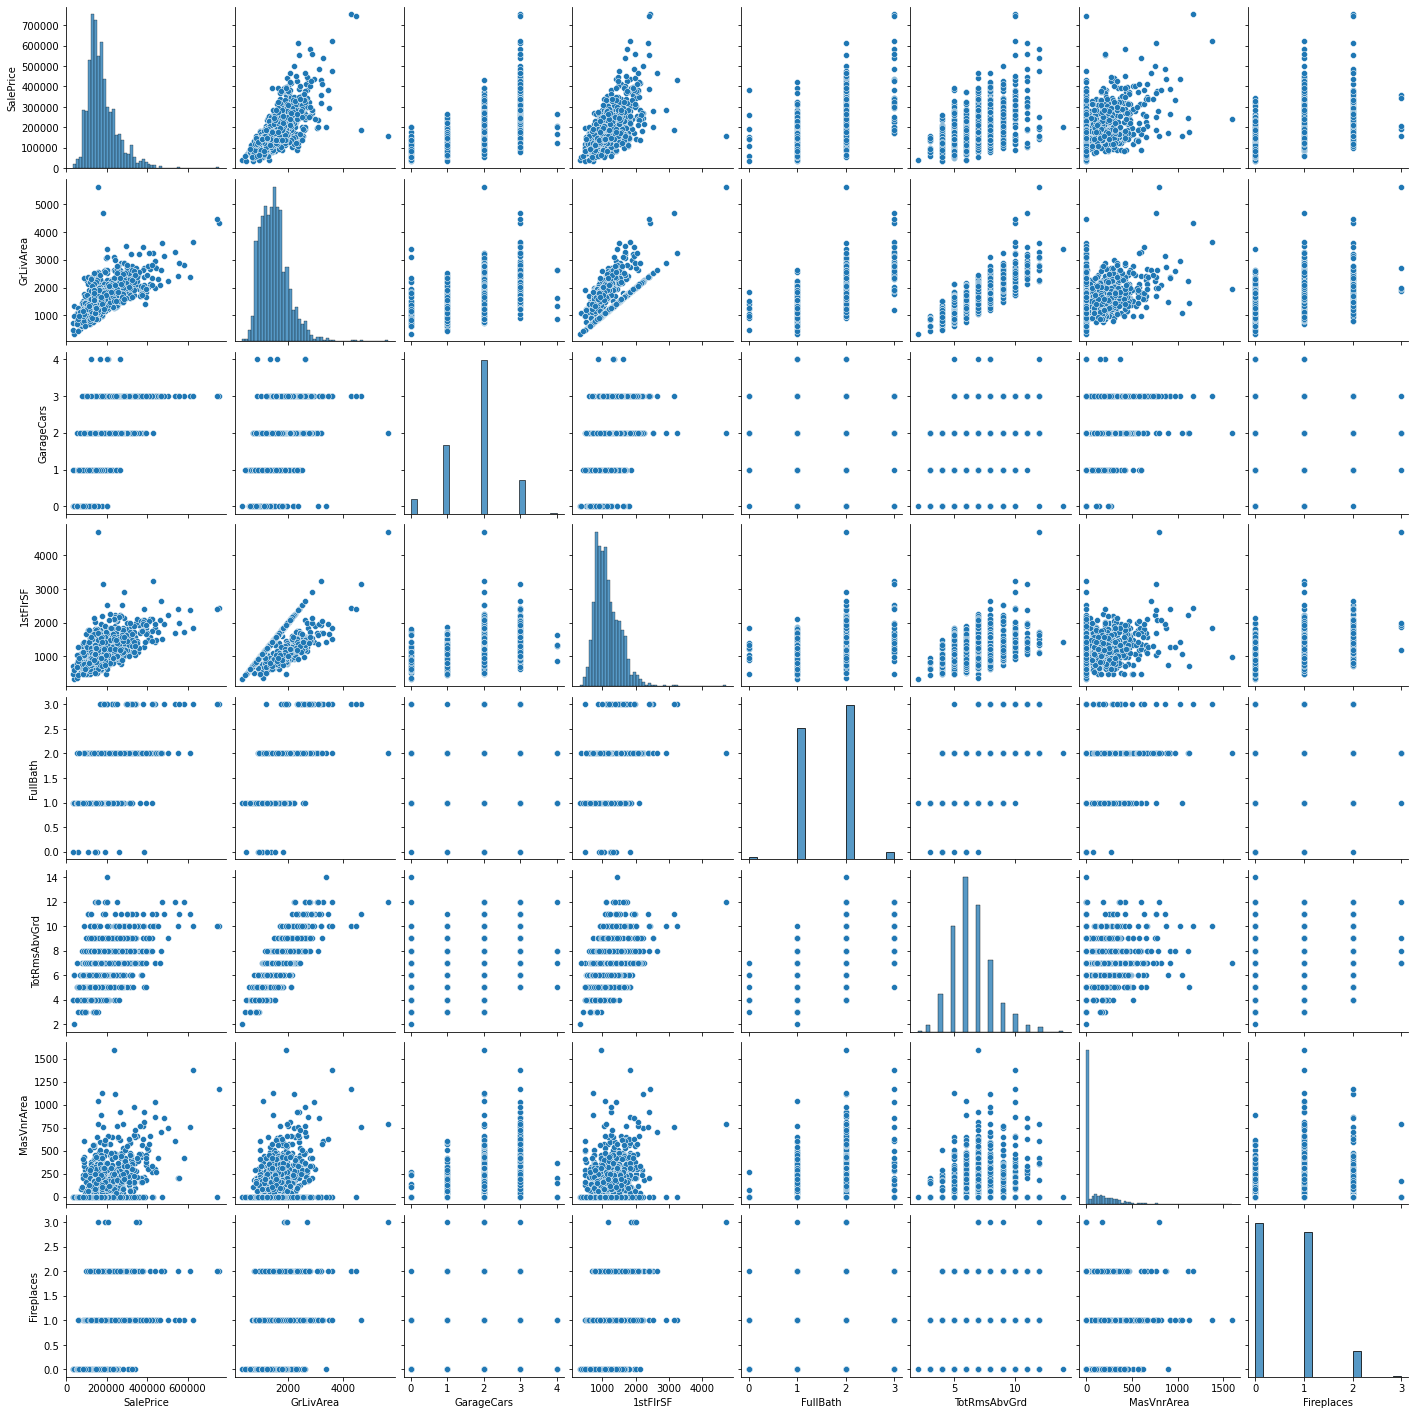

In [ ]:
highly_corr=['SalePrice','GrLivArea','GarageCars','1stFlrSF','FullBath','TotRmsAbvGrd','MasVnrArea','Fireplaces']
sns.pairplot(data=numerical[highly_corr])
plt.show()


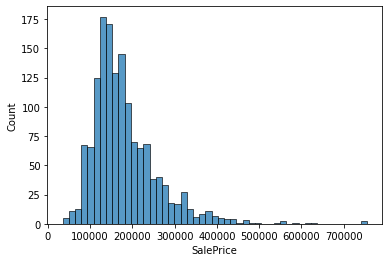

In [ ]:
#Histogram of SalePrice
sns.histplot(numerical['SalePrice'])
plt.show()

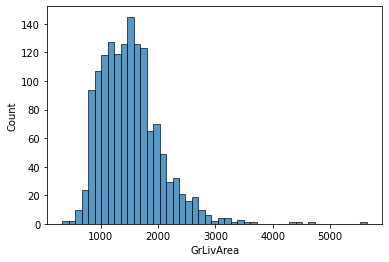

In [ ]:
#Histogram of GrLivArea
sns.histplot(numerical['GrLivArea'])
plt.show()

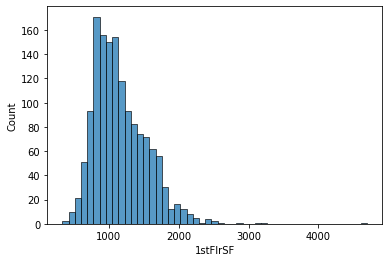

In [ ]:
#Histogram of 1stFlrSF
sns.histplot(numerical['1stFlrSF'])
plt.show()

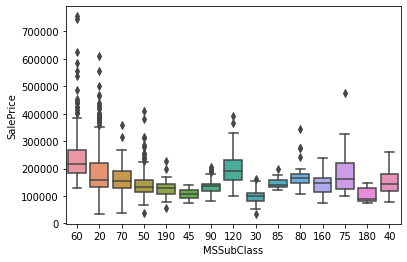

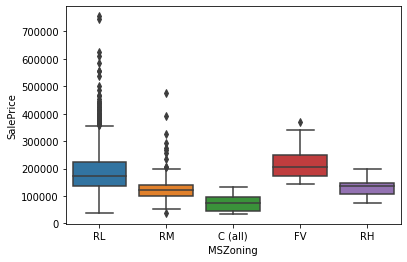

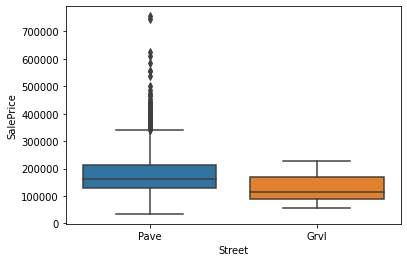

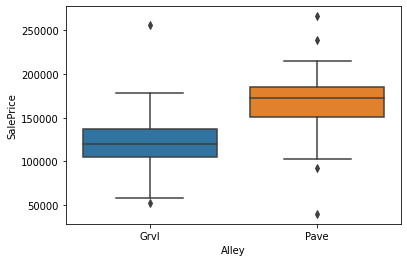

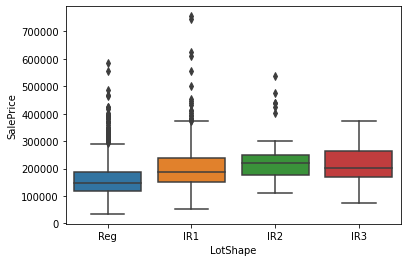

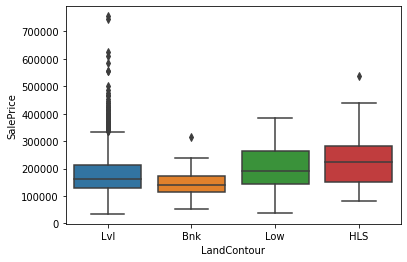

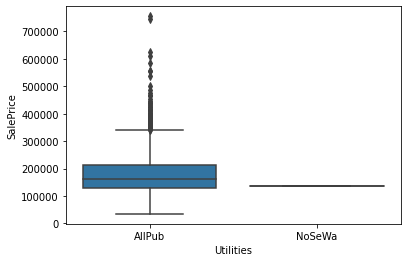

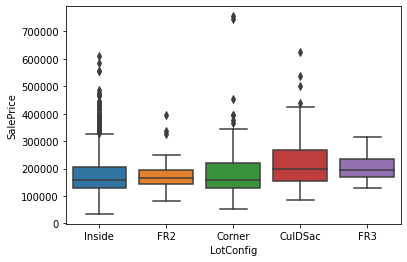

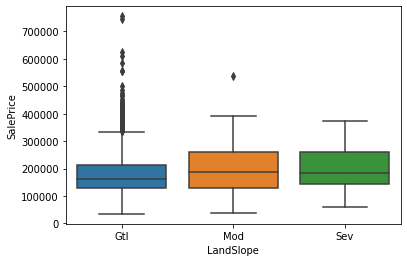

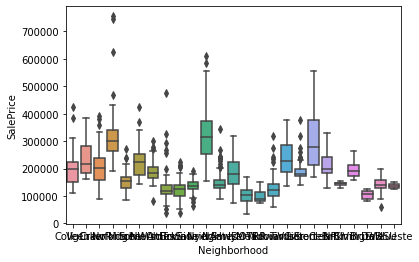

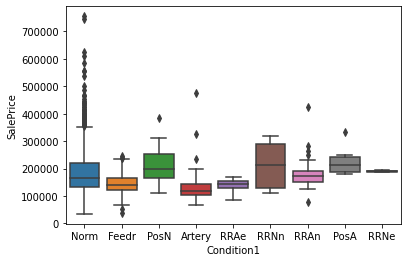

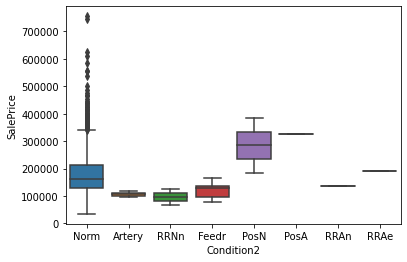

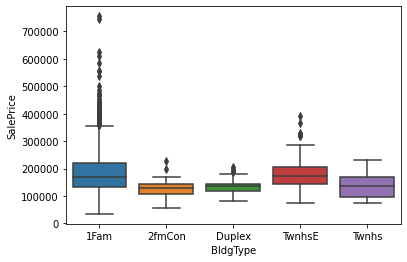

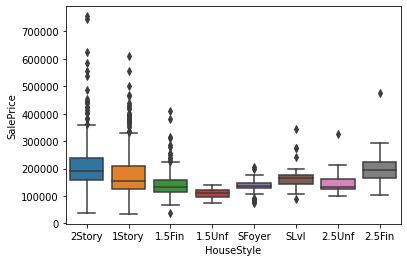

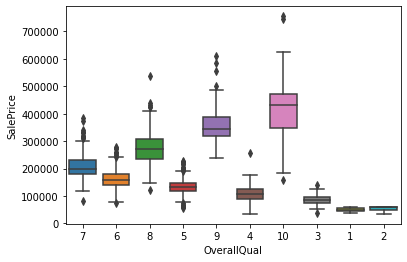

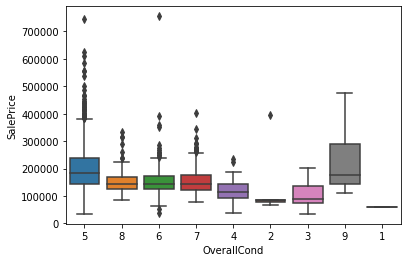

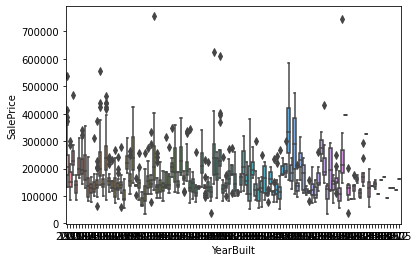

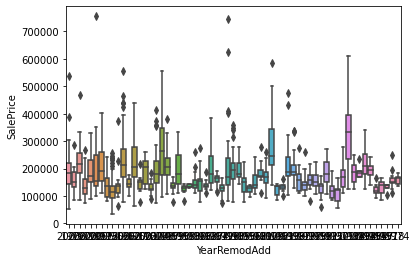

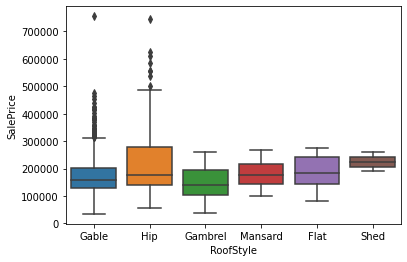

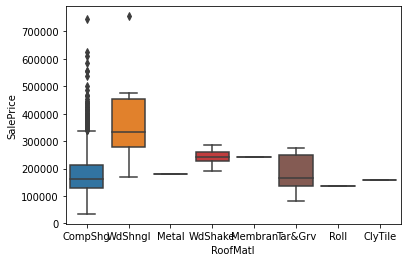

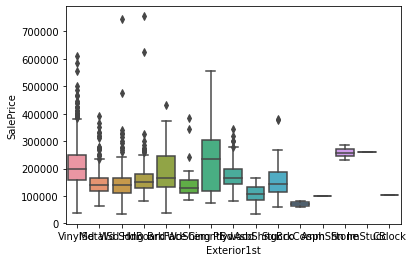

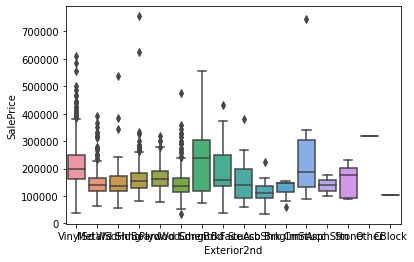

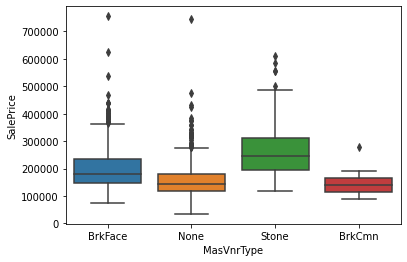

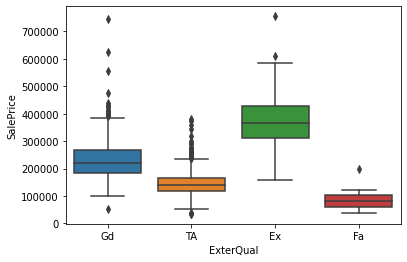

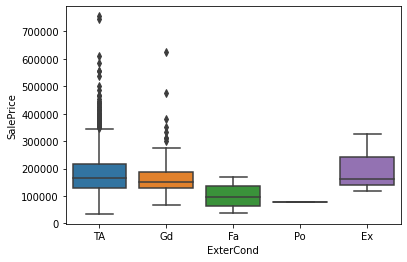

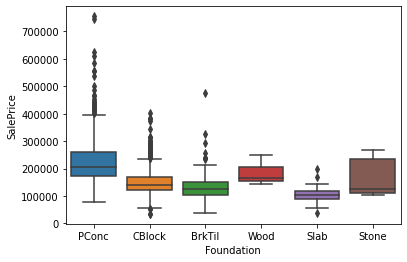

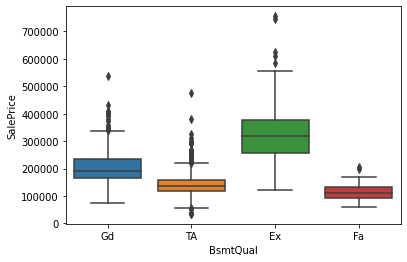

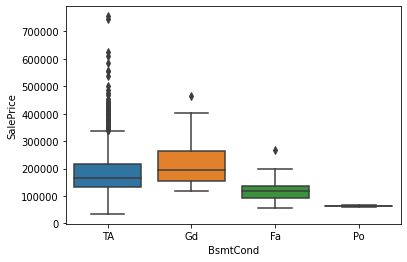

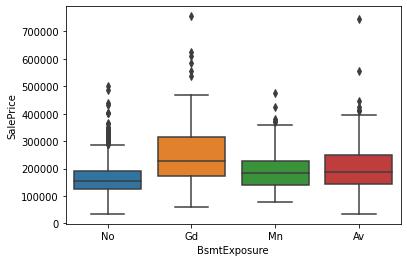

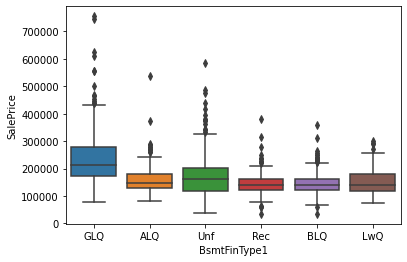

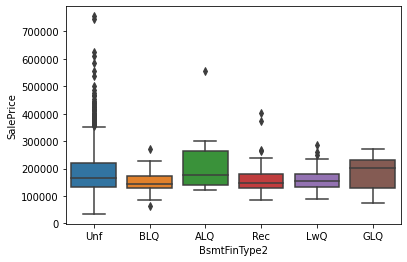

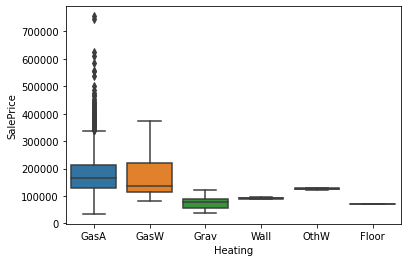

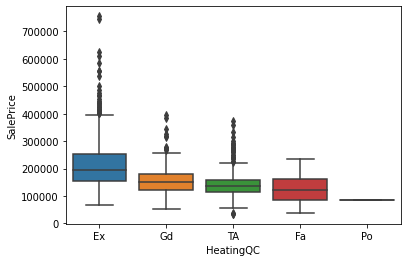

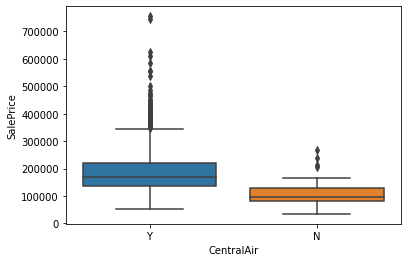

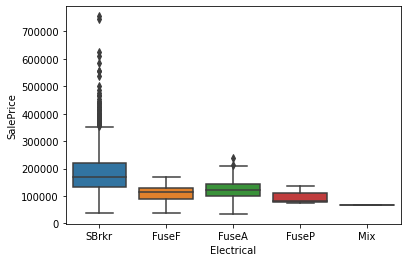

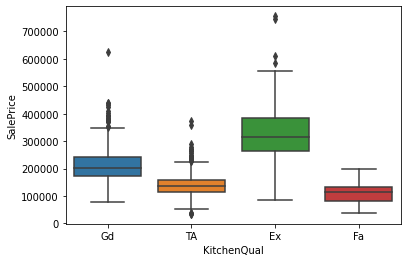

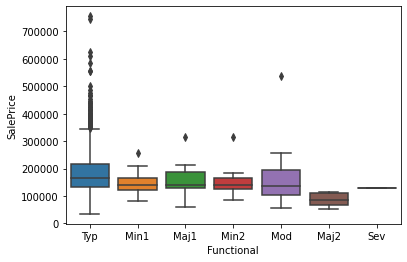

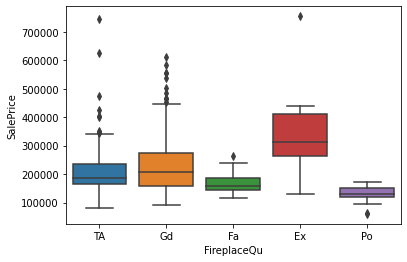

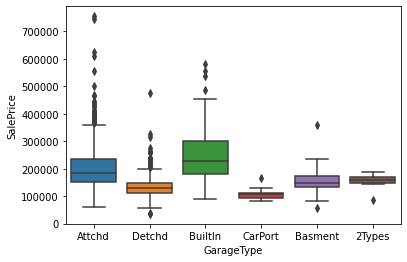

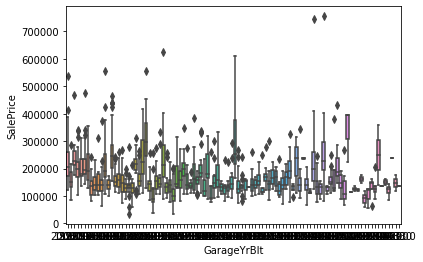

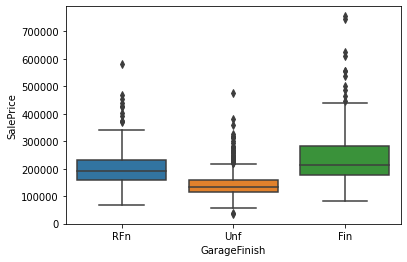

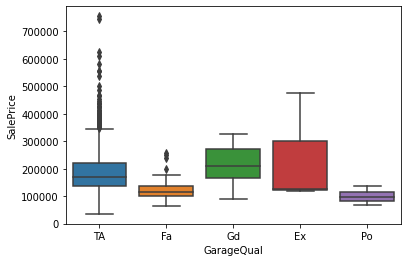

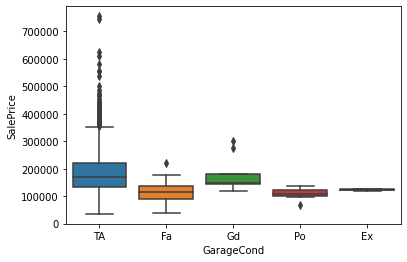

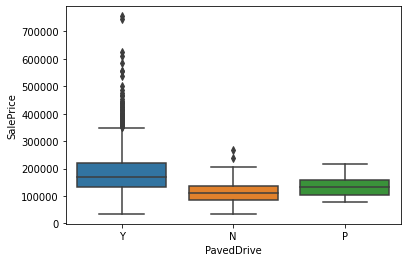

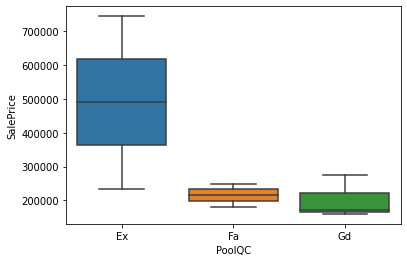

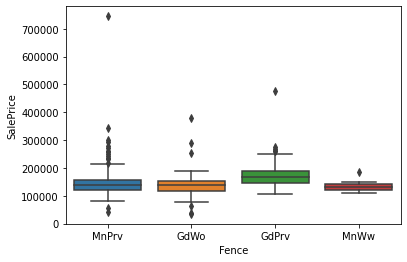

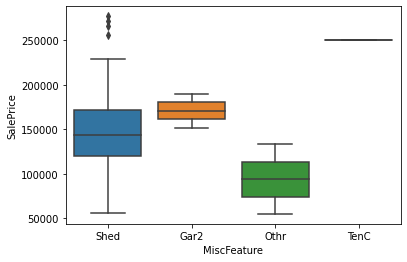

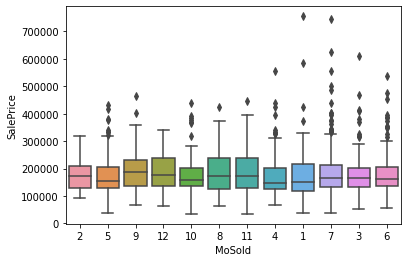

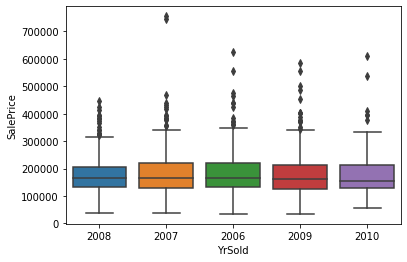

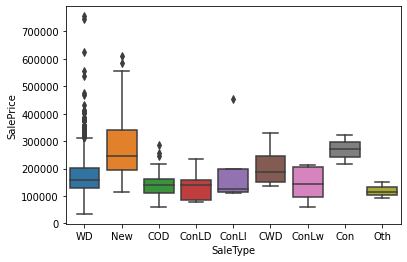

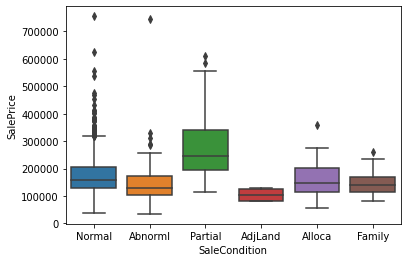

In [ ]:
#Analyzing categorical data (Box plot of SalePrice Vs all categorial variables)
list_categorical=[x for x in training.columns if training[x].dtype=='object']
for i in list_categorical:
  sns.boxplot(x=i,y='SalePrice',data=training)
  plt.show()



# Data Preparation and Feature Engineering

## **Missing Values**

In [ ]:
#Missing Values
missing_values_training=training.isna().sum()/training.shape[0]*100
print('\n% of Missing values for training data')
print(missing_values_training.sort_values(ascending=False).head(20).round(2))

missing_values_test=test.isna().sum()/test.shape[0]*100
print('\n% of Missing values for test data')
print(missing_values_test.sort_values(ascending=False).head(20).round(2))




% of Missing values for training data
PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageFinish     5.55
GarageType       5.55
GarageQual       5.55
GarageCond       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
RoofStyle        0.00
RoofMatl         0.00
dtype: float64

% of Missing values for test data
PoolQC          99.79
MiscFeature     96.50
Alley           92.67
Fence           80.12
FireplaceQu     50.03
LotFrontage     15.56
GarageFinish     5.35
GarageYrBlt      5.35
GarageCond       5.35
GarageQual       5.35
GarageType       5.21
BsmtCond         3.08
BsmtQual         3.02
BsmtExposure     3.02
BsmtFinType2     2.88
BsmtFinType1     2.88
MasVnrType       1.10
MasVnrArea       1.03
MSZoning         0.27
BsmtHalfBath     0.14
dtype: float64


We are going to delete variables that have more than 15% of missing values.
In this case, 6 variables.

Before dropping the varibles could be necesary to check if a NaN value really represents that or represent another category in the variable. To do this we can check the variables dictionary.

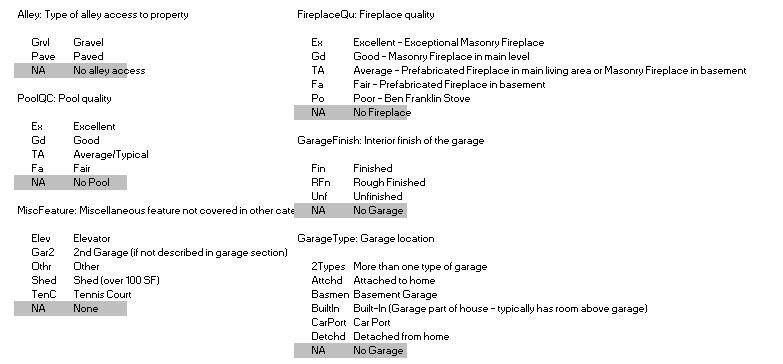




In [ ]:
#Filling NaN with correct category
to_fill=['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','GarageFinish','GarageType','BsmtCond','BsmtExposure','BsmtFinType1','GarageCond']

for i in to_fill:
  all_data[i]=all_data[i].fillna('No')

print('\n',all_data.isna().sum().sort_values(ascending=False))


 SalePrice       1459
LotFrontage      486
GarageYrBlt      159
GarageQual       159
BsmtQual          81
                ... 
LowQualFinSF       0
2ndFlrSF           0
1stFlrSF           0
CentralAir         0
Id                 0
Length: 82, dtype: int64


Now, we can evaluate if we can drop variables given that some of them give the same information.

* 'GarageCars','GarageArea', 'TotalBsmtSF' , '1stFlrSF','GarageQual','GarageCond','OverallQual','OverallCond','ExterQual','ExterCond'

* In addition, variables of basement can be dropped: BsmtQual, BsmtFinType2 , BsmtFinSF2,BsmtUnfSF


In [ ]:
#Drop variables
all_data.drop(['GarageArea','1stFlrSF','GarageQual','OverallQual','ExterQual','BsmtQual','BsmtFinType2' , 'BsmtFinSF2','BsmtUnfSF'],axis=1,inplace=True)

In [ ]:
#Checking again missing values
all_data.isna().sum().sort_values(ascending=False).head(20)

SalePrice       1459
LotFrontage      486
GarageYrBlt      159
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Utilities          2
Functional         2
GarageCars         1
Exterior2nd        1
Exterior1st        1
KitchenQual        1
BsmtFinSF1         1
Electrical         1
TotalBsmtSF        1
SaleType           1
LotShape           0
BsmtFinType1       0
dtype: int64

Missing values in SalePrice correspond to TestData, where there´s no SalePrice column.

For variables **LotFrontage and GarageYrBlt** we are going to **imput** the data. For the rest variables we are gonna delete rows with missing values.

In [ ]:
#Imputing Data
print(all_data[['LotFrontage','GarageYrBlt']].describe())

count_yearblt=pd.DataFrame(all_data.GarageYrBlt.value_counts())
count_yearblt.head(30)

all_data['GarageYrBlt'].fillna(all_data.GarageYrBlt.mode()[0],inplace=True)
all_data['LotFrontage'].fillna(all_data.LotFrontage.mean(),inplace=True)


       LotFrontage  GarageYrBlt
count  2433.000000  2760.000000
mean     69.305795  1978.113406
std      23.344905    25.574285
min      21.000000  1895.000000
25%      59.000000  1960.000000
50%      68.000000  1979.000000
75%      80.000000  2002.000000
max     313.000000  2207.000000


In [ ]:
#Impute the rest variables

to_fill=['MasVnrType','MasVnrArea','MSZoning','BsmtFullBath','BsmtHalfBath','Utilities','Functional','Electrical','GarageCars','Exterior2nd','Exterior1st','KitchenQual','TotalBsmtSF','BsmtFinSF1','SaleType']

for i in to_fill:
  if all_data[i].dtype=='object':
    
    all_data[i].fillna(all_data[i].value_counts().reset_index().sort_values(by=i,ascending=False).iloc[0,0],inplace=True)
    
  else:

        all_data[i].fillna(all_data[i].mode()[0],inplace=True)


#all_data.dropna(subset=['MasVnrType','MasVnrArea','MSZoning','BsmtFullBath','BsmtHalfBath','Utilities','Functional','Electrical','GarageCars','Exterior2nd','Exterior1st','KitchenQual','TotalBsmtSF','BsmtFinSF1','SaleType'],inplace=True)

all_data.isna().sum().sort_values(ascending=False)

SalePrice      1459
YearBuilt         0
RoofStyle         0
RoofMatl          0
Exterior1st       0
               ... 
Fireplaces        0
FireplaceQu       0
GarageType        0
GarageYrBlt       0
Id                0
Length: 73, dtype: int64

In [ ]:
#Checking quantity of categories for each feature
cat_all_data = all_data.select_dtypes(include=['object'])

for i in cat_all_data.columns:
  print('\n',cat_all_data[i].value_counts().sort_values(ascending=False))


change_dictionary={'MSZoning':27,'Neighborhood':100,'Condition1':40,'Condition2':14
                   ,'HouseStyle':25,'RoofStyle':23,'RoofMatl':24,
                   'Exterior1st':55,'Exterior2nd':23,'Foundation':12,
                   'Functional':36,'GarageType':37,'MiscFeature':96,'SaleType':27}


for key,value in change_dictionary.items():
  counts=cat_all_data[key].value_counts()
  mask=all_data[key].isin(counts[counts<value].index)
  all_data[key][mask]='Other'



 RL         2269
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

 Pave    2907
Grvl      12
Name: Street, dtype: int64

 No      2721
Grvl     120
Pave      78
Name: Alley, dtype: int64

 Reg    1859
IR1     968
IR2      76
IR3      16
Name: LotShape, dtype: int64

 Lvl    2622
HLS     120
Bnk     117
Low      60
Name: LandContour, dtype: int64

 AllPub    2918
NoSeWa       1
Name: Utilities, dtype: int64

 Inside     2133
Corner      511
CulDSac     176
FR2          85
FR3          14
Name: LotConfig, dtype: int64

 Gtl    2778
Mod     125
Sev      16
Name: LandSlope, dtype: int64

 NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Bl

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to b

## **Feature Engineering**

In [ ]:
#Merge Condition1 and Condition
all_data.Condition1=all_data.Condition1+'+'+all_data.Condition2
all_data.Condition1.replace({'Norm+Norm':'Norm'},inplace=True)

all_data.drop('Condition2',axis=1,inplace=True)



In [ ]:
#YearBuilt
print(all_data.YearBuilt.unique())

#Remapping the variable
label_ranges = [0, 1900, 2000, np.inf]
label_names= ['1800-1900','1900-2000','>2000']
all_data['YearBuilt_cat']=pd.cut(all_data.YearBuilt,bins=label_ranges,labels=label_names)
all_data['GarageYrBlt']=pd.cut(all_data.GarageYrBlt,bins=label_ranges,labels=label_names)

print(all_data.YearBuilt_cat.unique())


[2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905
 1907 1896 1902 1895 1879 1901]
['>2000', '1900-2000', '1800-1900']
Categories (3, object): ['1800-1900' < '1900-2000' < '>2000']


In [ ]:
#We can create a new variable that indicates if the house was remodeled 0:No 1:Yes
all_data['Remodeled']=all_data.apply(lambda x: 0 if x.YearBuilt==x.YearRemodAdd else 1,axis=1)

In [ ]:
#After feature engineering we drop these variables
all_data.drop(['Id','YearRemodAdd','YearBuilt','Exterior2nd','MSSubClass'],axis=1,inplace=True)

In [ ]:
#Add new variable: sum of square feet first and second floor
all_data['TotalSqrFt']=all_data['TotalBsmtSF']+all_data['2ndFlrSF']

In [ ]:
#Add new variable: Ratio of finished basement area
all_data['BsmtRatioFin']=all_data['BsmtFinSF1']/all_data['TotalBsmtSF']

#Ckecking
all_data.BsmtRatioFin.describe()
mask=all_data.BsmtRatioFin.isna()
all_data[['BsmtFinSF1','TotalBsmtSF']][mask]

#Filling NaN
all_data.BsmtRatioFin.fillna(0,inplace=True)
all_data.BsmtRatioFin.isna().sum()


0

In [ ]:
#Add new variable: Season based on month sold
all_data['Season']=all_data['MoSold']

all_data['Season'].replace({3:'Spring',4:'Spring',5:'Spring',6:'Summer',7:'Summer',
                                        8:'Summer',9:'Fall',10:'Fall',
                                        11:'Fall',12:'Winter',1:'Winter',2:'Winter'},inplace=True)


#Checking if everything is OK
print(all_data.MoSold.head())
print(all_data.Season.head())



0     2
1     5
2     9
3     2
4    12
Name: MoSold, dtype: int64
0    Winter
1    Spring
2      Fall
3    Winter
4    Winter
Name: Season, dtype: object


In [ ]:
#Changing data types in all_data
all_data[['OverallCond','GarageYrBlt','MoSold','YrSold']]=all_data[['OverallCond','GarageYrBlt','MoSold','YrSold']].astype('str')

In [ ]:
#Getting dummy variables
all_datadummy=pd.get_dummies(all_data,drop_first=True)
all_datadummy.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,training_data,Remodeled,TotalSqrFt,BsmtRatioFin,MSZoning_Other,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_No,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No,MiscFeature_Other,MoSold_10,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SaleType_New,SaleType_Other,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,YearBuilt_cat_1900-2000,YearBuilt_cat_>2000,Season_Spring,Season_Summer,Season_Winter
0,65.0,8450,196.0,706.0,856.0,854,0,1710,1.0,0.0,2,1,3,1,8,0,2.0,0,61,0,0,0,0,0,208500.0,1,0,1710.0,0.824766,0,1,0,1,1,0,0,0,1,0,0,...,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1
1,80.0,9600,0.0,978.0,1262.0,0,0,1262,0.0,1.0,2,0,3,1,6,1,2.0,298,0,0,0,0,0,0,181500.0,1,0,1262.0,0.774960,0,1,0,1,1,0,0,0,1,0,0,...,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0
2,68.0,11250,162.0,486.0,920.0,866,0,1786,1.0,0.0,2,1,3,1,6,1,2.0,0,42,0,0,0,0,0,223500.0,1,1,1786.0,0.528261,0,1,0,1,1,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0
3,60.0,9550,0.0,216.0,756.0,756,0,1717,1.0,0.0,1,0,3,1,7,1,3.0,0,35,272,0,0,0,0,140000.0,1,1,1512.0,0.285714,0,1,0,1,1,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
4,84.0,14260,350.0,655.0,1145.0,1053,0,2198,1.0,0.0,2,1,4,1,9,1,3.0,192,84,0,0,0,0,0,250000.0,1,0,2198.0,0.572052,0,1,0,1,1,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1


# Machine Learning

In this section we´re gonna import all sckit learn modules and split our training data into X_train and X_test as well as y_train and y_test

In [ ]:

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
import xgboost as xgb


from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
#Split X and y
X=all_datadummy[all_datadummy.training_data==1].drop(['SalePrice','training_data'],axis=1)
y=all_datadummy[['SalePrice','training_data']]
y=y[y.training_data==1].drop('training_data',axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.3, random_state=123)


In [ ]:
#Running null models

#Initialize
dt=DecisionTreeRegressor(random_state=123)
rf=RandomForestRegressor(random_state=123)
ab=AdaBoostRegressor(random_state=123)
gb=GradientBoostingRegressor(random_state=123)
svm=SVR()
xgbr=XGBRegressor(random_state=123)


model_dictionary={dt:'Decision Tree',rf:'Random Forest',ab:'Ada Boost',gb:'Gradient Boosting',svm:'Support Vetor Machine',xgbr:'XGboost regressor'}

I'm gonna write a function that evaluates every model and calculate de root MSE in CV and root MSE in the test set

In [ ]:
def performance(model_dictionary,X_for_training,y_for_training,X_for_test,y_for_test):

  null_list1=[]
  null_list2=[]

  for key,value in model_dictionary.items():
    cv_mse=-cross_val_score(key,X_for_training,y_for_training.values.ravel(),cv=10,scoring='neg_mean_squared_error')
    #Calculate root mse in CV
    rmse_cv=np.round((cv_mse.mean())**(1/2),2)

    key.fit(X_for_training,y_for_training.values.ravel())
    y_pred=key.predict(X_for_test)

    #Calculate root mse in Test
    rmse_test=np.round(MSE(y_for_test,y_pred)**(1/2),2)
    null_list1.append(rmse_cv)
    null_list2.append(rmse_test)

  index=[x for x in model_dictionary.values()]
  dff=pd.DataFrame([null_list1,null_list2],index=['Root MSE-CV','Root MSE-Test Set']).transpose()
  dff.index=index
  print(dff)



In [ ]:
#Check performance
performance(model_dictionary,X_for_training=X_train,y_for_training=y_train,X_for_test=X_test,y_for_test=y_test)

#The results bellow show us a reference:

[16:50:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:50:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:50:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:50:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:50:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:50:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:50:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:50:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

## Hyperparameter tunning

Evaluating feature importance

In [ ]:


#Visualizing Feature importances

#For Gradient Boostng
importances = pd.Series(data=gb.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values(ascending=False)
print(importances_sorted)

#For XGBoost
importances2 = pd.Series(data=xgbr.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted2 = importances2.sort_values(ascending=False)
print('\n\n',importances_sorted2)



TotalSqrFt               0.401635
TotalBsmtSF              0.129046
GarageCars               0.112246
BsmtFinSF1               0.062145
GrLivArea                0.048452
                           ...   
RoofStyle_Hip            0.000000
GarageYrBlt_1900-2000    0.000000
Exterior1st_Other        0.000000
Exterior1st_Plywood      0.000000
Season_Winter            0.000000
Length: 196, dtype: float64


 TotalSqrFt             0.230476
GarageCars             0.127057
Foundation_PConc       0.062380
KitchenQual_TA         0.053037
TotalBsmtSF            0.044402
                         ...   
HouseStyle_Other       0.000000
HouseStyle_SFoyer      0.000000
HeatingQC_Po           0.000000
OverallCond_2          0.000000
Neighborhood_NWAmes    0.000000
Length: 196, dtype: float32


In [ ]:

#Extracting feature importances
dfimportances1=importances_sorted.reset_index()
dfimportances2=importances_sorted2.reset_index()

#Changing column names
dfimportances1.columns=['variable','feature_importance']
dfimportances2.columns=['variable','feature_importance']

#Describe Feature importance
print(dfimportances1.describe())
print(dfimportances2.describe())

#Feature importance treshold
dfimportances1=dfimportances1[dfimportances1['feature_importance']>0.000495]
dfimportances2=dfimportances2[dfimportances2['feature_importance']>0.002047]

#Appending feature importances
dfimportancesappend=dfimportances1.append(dfimportances2)

#Create a list of final features
important_features=dfimportancesappend.variable.unique()

important_features2=[i for i in important_features]

print(important_features2)


       feature_importance
count          196.000000
mean             0.005102
std              0.031682
min              0.000000
25%              0.000000
50%              0.000044
75%              0.000495
max              0.401635
       feature_importance
count          196.000000
mean             0.005102
std              0.020387
min              0.000000
25%              0.000000
50%              0.000000
75%              0.002047
max              0.230476
['TotalSqrFt', 'TotalBsmtSF', 'GarageCars', 'BsmtFinSF1', 'GrLivArea', '2ndFlrSF', 'KitchenQual_TA', 'Foundation_PConc', 'LotArea', 'BsmtFinType1_GLQ', 'FireplaceQu_No', 'YearBuilt_cat_>2000', 'Fireplaces', 'OpenPorchSF', 'KitchenAbvGr', 'CentralAir_Y', 'FullBath', 'Condition1_Norm', 'SaleType_New', 'Neighborhood_NridgHt', 'LotFrontage', 'Neighborhood_Edwards', 'GarageCond_TA', 'BsmtRatioFin', 'WoodDeckSF', 'MSZoning_RL', 'BedroomAbvGr', 'TotRmsAbvGrd', 'OverallCond_3', 'MSZoning_RM', 'OverallCond_4', 'GarageType_Detchd', 'Hal

In [ ]:
#Modify X train and test

X_train_mod=X_train[important_features2]

X_test_mod=X_test[important_features2]

#Check
print(X_train_mod.shape)
print(X_test_mod.shape)

(1022, 55)
(438, 55)


In [ ]:
#Tunning Random Forest
params_rf={'n_estimators':[1000,2000,3000],
           'random_state':[123],
           'min_samples_leaf':[1,4,8,10],
           'max_depth':[3,4,5,7]
           }

params_gb={'learning_rate':[0.05,0.1,0.25,0.5],
           'n_estimators':[1000,2000,3000],
           'random_state':[123],'subsample':[0.3,0.4,0.6,0.8],
           'max_depth':[3,5,7,9,10]

           }

params_xgbr={'n_estimators ':[1000,2000,3000],'max_depth ':[3,4,5,6],
             'learning_rate':[0.001, 0.01, 0.1],'random_state':[123],
             'colsample_bytree':[0.3,0.7],'subsample':[0.3,0.4,0.6,0.7]}

dictionary_model_params={rf:params_rf,gb:params_gb,xgbr:params_xgbr}
model_names=['Random Forest','Gradient Boosting','Xgboost regressor']

In [ ]:
#Create a function to evaluate model via RandomizedSearchCV
best_model_parameters=[]

def performance2(model_dictionary_params,model_names,X_for_training,y_for_training,X_for_test,y_for_test):

  #Empty Lists to save root MSEs
  tuning_rootMSE_cv=[]
  tunning_rootMSE_test=[]

  #Create this global variable in order to extract model later outside the function
  global best_model_parameters
  

  for key,val in model_dictionary_params.items():

    grid_model=RandomizedSearchCV(key,param_distributions=val,scoring='neg_mean_squared_error',cv=10,n_jobs=-1,random_state=123)
    grid_model.fit(X_for_training,y_for_training.values.ravel())

    rootMSE_cv=np.round(((grid_model.best_score_)*-1)**(1/2),2)

    best_model=grid_model.best_estimator_
    y_pred=best_model.predict(X_for_test)

    rootMSE_test=np.round((MSE(y_for_test,y_pred))**(1/2),2)

    tuning_rootMSE_cv.append(rootMSE_cv)
    tunning_rootMSE_test.append(rootMSE_test)

    #Saving parameters
    best_model_parameters.append(best_model)

  dff2=pd.DataFrame([tuning_rootMSE_cv,tunning_rootMSE_test],index=['Root MSE-CV','Root MSE-Test Set']).transpose()
  dff2.index=model_names
  print(dff2)



In [ ]:
'''

grid_cv=GridSearchCV(estimator=xgbr,param_grid=params_xgbr,scoring='neg_mean_squared_error',cv=10,n_jobs=-1)


grid_cv.fit(X_train,y_train)

rootMSE_cv=np.round(((grid_cv.best_score_)*-1)**(1/2),2)

best_model=grid_cv.best_estimator_
y_pred=best_model.predict(X_test)

rootMSE_test=np.round((MSE(y_test,y_pred))**(1/2),2)

print('RootMSE CV: ',rootMSE_cv)

print('RootMSE test: ',rootMSE_test)

'''


"\n\ngrid_cv=GridSearchCV(estimator=xgbr,param_grid=params_xgbr,scoring='neg_mean_squared_error',cv=10,n_jobs=-1)\n\n\ngrid_cv.fit(X_train,y_train)\n\nrootMSE_cv=np.round(((grid_cv.best_score_)*-1)**(1/2),2)\n\nbest_model=grid_cv.best_estimator_\ny_pred=best_model.predict(X_test)\n\nrootMSE_test=np.round((MSE(y_test,y_pred))**(1/2),2)\n\nprint('RootMSE CV: ',rootMSE_cv)\n\nprint('RootMSE test: ',rootMSE_test)\n\n"

In [ ]:

#Evaluating performance
performance2(dictionary_model_params,model_names,X_for_training=X_train,y_for_training=y_train,X_for_test=X_test,y_for_test=y_test)



[17:19:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
                   Root MSE-CV  Root MSE-Test Set
Random Forest         35024.50           32086.07
Gradient Boosting     30077.63           29040.99
Xgboost regressor     32510.91           28342.08


Lets make ensembling to improve performance

In [ ]:
#Ensembling

#Selecting best models for ensembling: Gradient Boosting and XGBoost
#best_rf=best_model_parameters[0]
best_gb=best_model_parameters[1]
best_xgbr=best_model_parameters[2]
#regressors=[('Random Forest',best_rf),('Gradient Boosting',best_gb),('XGBoost',best_xgbr)]
regressors=[('Gradient Boosting',best_gb),('XGBoost',best_xgbr)]
#Instatiate voting regressor
voting_reg=VotingRegressor(estimators=regressors)

#Fit voting regressor
voting_reg.fit(X_train_mod,y_train)

#Make predictions
y_pred=voting_reg.predict(X_test_mod)

MSE_test_voting=np.round((MSE(y_test,y_pred))**(1/2),2)

print('MSE Test=',MSE_test_voting)


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_voting.py:406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[17:20:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MSE Test= 27299.06


In [ ]:
final_model=voting_reg


In [ ]:
'''
#Preparing data for predictions
X_for_predictions=all_datadummy[all_datadummy.training_data==0].drop(['SalePrice','training_data'],axis=1)
'''

"\n#Preparing data for predictions\nX_for_predictions=all_datadummy[all_datadummy.training_data==0].drop(['SalePrice','training_data'],axis=1)\n"

In [ ]:


#Preparing data for predictions
X_for_predictions=all_datadummy[all_datadummy.training_data==0].drop(['SalePrice','training_data'],axis=1)
X_for_predictions=X_for_predictions[important_features2]
X_for_predictions.shape



(1459, 55)

In [ ]:
#Making predictions
final_predictions=final_model.predict(X_for_predictions)

In [ ]:
#Building data frame for submision
final_predictions_sub=pd.DataFrame({'Id':test['Id'],'SalePrice':final_predictions})

In [ ]:
#Submision File
final_predictions_sub.to_csv('submision_house_prediction.csv',index=None)